In [32]:
import os
import zipfile

In [33]:
local_zip = './tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/horse-or-human')
zip_ref.close()

In [34]:
# 马的训练集
train_horse_dir = os.path.join('./tmp/horse-or-human/horses')
# 人的训练集
train_human_dir = os.path.join('./tmp/horse-or-human/humans')

In [35]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [36]:
print('计数：训练马的照片：', len(os.listdir(train_horse_dir)))
print('计数：训练人的照片：', len(os.listdir(train_human_dir)))

计数：训练马的照片： 500
计数：训练人的照片： 527


In [37]:
# matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 作图大小参数
nrows = 4
ncols = 4
# 用于在图像上迭代的索引
pic_index = 0

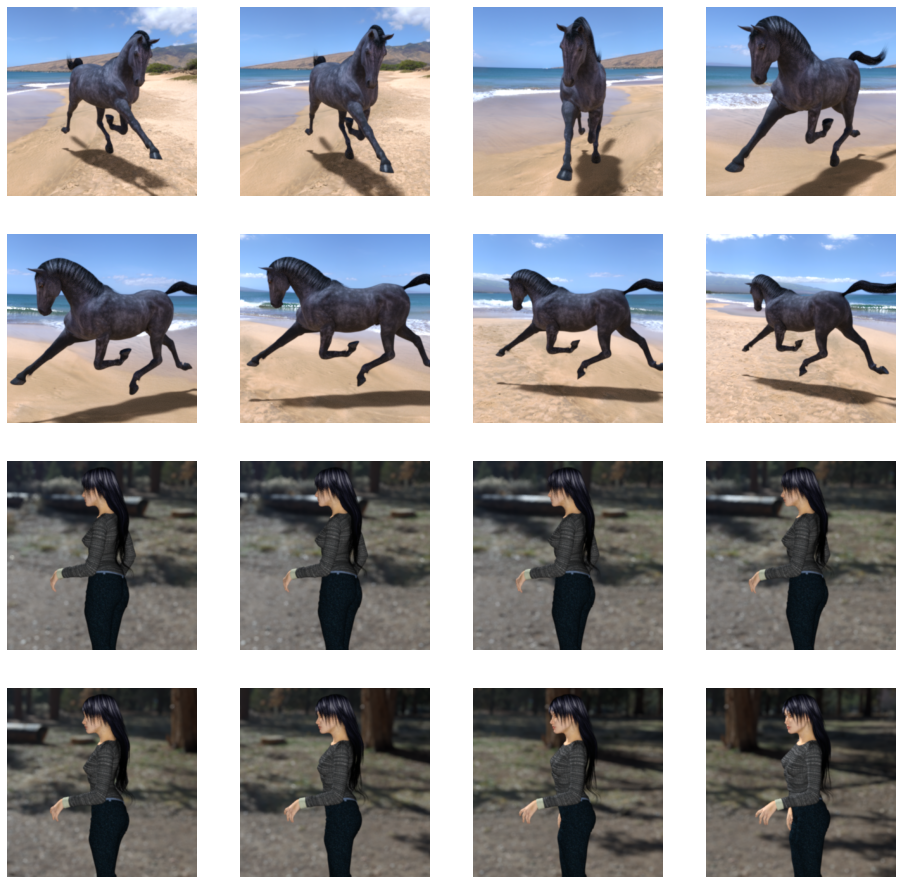

In [42]:
# 作4*4的图
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                 for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # set up subplot;   subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')# 不展示坐标轴线
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [43]:
import tensorflow as tf

In [44]:
model = tf.keras.models.Sequential([
    # 输入300*300彩色图像，每个需要3bytes存储色彩
    # 第一次卷积
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 第二次卷积
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 第三次卷积
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 第四次卷积
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 第五次卷积
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 结果输入DNN
    tf.keras.layers.Flatten(),
    # 512个神经元内含层
    tf.keras.layers.Dense(512, activation='relu'),
    # 只有一个输出神经元，它将包含一个0-1内的值，其中0意味着马，1意味着人
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [46]:
from tensorflow.keras.optimizers import RMSprop

In [48]:
model.compile(loss='binary_crossentropy',
              # 均方根传递RMSprop
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['acc'])

In [ ]:
# 值的归一化
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 所有图像均被重新调节为1/255
train_datagen = ImageDataGenerator(rescale=1/255)
# 随着训练集图片被ImageDataGenerator处批理成128*128大小
train_generator = train_datagen.flow_from_directory()